# HW1. SQL Basics

## Objectives

In this homework assignment, you will use SQL to store and query a database. You will learn the followings:

 - How to create a database
 - How to load an available database
 - How to create a table 
 - How to change a table after creation
 - How to insert data into a table
 - How to select certain rows or columns from a table
 - How to join two tables together
 - How to use expressions
 

You will also use [SQLite](https://en.wikipedia.org/wiki/SQLite) as the DBMS. In contrast to many other database management systems (e.g., Oracle, DB2, and SQL Server), SQLite is not a client–server database engine. Rather, it is embedded into the end program. This unique feature has led it to be adopted by [billions of applications](https://www.sqlite.org/mostdeployed.html). 

This assignment has a total of five questions and 25 points. 

### Code style
No penalty for bad code style but it is recomended to use the standard SQL style https://www.sqlstyle.guide/ 


## Setup 

You need the same initial setup as for the Interactive Session 1.

# Questions

## Q1: Create a database (4 points)

The goal is to create a database to manage student and course information in computing science department (named `cssys`), and then create three tables in this database. The first table is named `students`, the second table is named `courses`, and the third table is called `transcript`. 

To start, please execute the following cell to load the sql extension.

In [1]:
%load_ext sql
%config SqlMagic.displaylimit = None


1.1 (1 point) Create an empty database  named `cssys`

In [2]:
%sql sqlite:///cssys.db

1.2 (1 point) Create a  table  named `students`

Please create a table named `students`.
The `students` table has six attributes: student id, first name, last name, age, gender, gpa:
* `id` - integer
* `firstname` - char(15)
* `lastname` - char(15)
* `age` - integer
* `gender` - char(1)
* `gpa` - double
* `id` is Primary Key

In [4]:
%%sql
DROP TABLE IF EXISTS students;
CREATE TABLE students (
    id INTEGER PRIMARY KEY,
    firstname CHAR(15),
    lastname CHAR(15),
    age INTEGER,
    gender CHAR(1),
    gpa DOUBLE
)

 * sqlite:///cssys.db
Done.
Done.


[]

1.3 (1 point) Create a table  named `courses`

Please create a table named `courses`.
The `courses` table has four attributes: id, name, credit, pre-requisites:
* `id`- integer
* `name` - varchar(30)
* `credit` - integer
* `prereq` - integer
* (`id`, `prereq`) is Primary Key

In [12]:
%%sql
CREATE TABLE courses (
    id INTEGER,
    name VARCHAR(30),
    credit INTEGER,
    prereq INTEGER,
    PRIMARY KEY (id, prereq)
)


 * sqlite:///cssys.db
(sqlite3.OperationalError) table courses already exists
[SQL: CREATE TABLE courses (
    id INTEGER,
    name VARCHAR(30),
    credit INTEGER,
    prereq INTEGER,
    PRIMARY KEY (id, prereq)
)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


1.4 (1 point) Create a table  named `transcript`

Please create a table named `transcript`.
The `transcript` table has five columns: studentid, courseid, mark, semester, credit:
* `studentid`- integer
* `courseid` - integer
* `mark` - double
* `semester` - integer (represented as `year + 01:fall, 02:spring, 03:summer`)
* `credit` - integer
* (`studentid`,`courseid`) is Primary Key

In [13]:
%%sql
CREATE TABLE transcript (
    studentid INTEGER,
    courseid INTEGER,
    mark DOUBLE,
    semester INTEGER,
    credit INTEGER,
    PRIMARY KEY (studentid, courseid)
)

 * sqlite:///cssys.db
(sqlite3.OperationalError) table transcript already exists
[SQL: CREATE TABLE transcript (
    studentid INTEGER,
    courseid INTEGER,
    mark DOUBLE,
    semester INTEGER,
    credit INTEGER,
    PRIMARY KEY (studentid, courseid)
)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [14]:

%%sql 
SELECT * FROM students


 * sqlite:///cssys.db
Done.


id,firstname,lastname,age,gender,gpa


In [15]:

%%sql 
SELECT * FROM courses


 * sqlite:///cssys.db
Done.


id,name,credit,prereq


In [16]:

%%sql 
SELECT * FROM transcript

 * sqlite:///cssys.db
Done.


studentid,courseid,mark,semester,credit


## Q2: Modify a database (2 point)

Please write SQL expressions to replace the age attribute with a Date of Birth (dob) attribute in the table `students`. Please decide on the type and the default value of this attribute and include it in your response. You should decide on how to perform this step (delete/recreate/modify). 

In [17]:
# %%sql

# ALTER TABLE students
# DROP COLUMN age;


# ALTER TABLE students
# ADD COLUMN dob DATE DEFAULT '2000-01-01';


 * sqlite:///cssys.db
Done.
Done.


[]

In [ ]:
# SQLite has limitations when it comes to modifying existing columns. 
# It doesn't natively support changing a column's data type or renaming a column while altering its properties. In SQLite, you cannot directly use ALTER TABLE to rename a column and then change its type or set a default value.

# %%sql
# ALTER TABLE students
# RENAME COLUMN age TO dob;


# ALTER TABLE students
# ALTER COLUMN dob TYPE DATE,
# ALTER COLUMN dob SET DEFAULT '2000-01-01';


# To achieve this in SQLite, you must use the "create and migrate" approach 

In [29]:
%%sql
DROP TABLE IF EXISTS students_old;
ALTER TABLE students RENAME TO students_old;

CREATE TABLE students (
    id INTEGER PRIMARY KEY,
    firstname CHAR(15),
    lastname CHAR(15),
    dob DATE DEFAULT '2000-01-01',
    gender CHAR(1),
    gpa DOUBLE
);

INSERT INTO students (id, firstname, lastname, dob, gender, gpa)
SELECT id, firstname, lastname, '2000-01-01', gender, gpa FROM students_old;

DROP TABLE students_old;

 * sqlite:///cssys.db
Done.
Done.
Done.
0 rows affected.
Done.


[]

In [35]:
%%sql 
SELECT * FROM students

 * sqlite:///cssys.db
Done.


id,firstname,lastname,dob,gender,gpa


## Q3: Add data to a database (3 points)

3.1 (1 point) Add rows to `students`.

Please write SQL queries to insert the following rows to the `students` table. Change the format of date of birth attribute value based on your definition of its type.
```
1001, adam, smith, 2000-01-03, m, 3.1
1002, alice, frank, 1999-03-11, f , 3.4
1003, bob, hal, 1999-09-01, m, 2
```

In [36]:
%%sql
INSERT INTO students (id, firstname, lastname, dob, gender, gpa) VALUES
(1001, 'adam', 'smith', '2000-01-03', 'm', 3.1),
(1002, 'alice', 'frank', '1999-03-11', 'f', 3.4),
(1003, 'bob', 'hal', '1999-09-01', 'm', 2.0);

 * sqlite:///cssys.db
3 rows affected.


[]

In [37]:
%%sql 
SELECT * FROM students

 * sqlite:///cssys.db
Done.


id,firstname,lastname,dob,gender,gpa
1001,adam,smith,2000-01-03,m,3.1
1002,alice,frank,1999-03-11,f,3.4
1003,bob,hal,1999-09-01,m,2.0


3.2 (1 point) Add rows to `courses`.

Please write SQL queries to insert the following rows to the `courses` table.
```
100, programming, 3, NULL
110, math, 3, NULL
120, web, 4, NULL
301, networking, 4, 200
301, networking, 4, 150
301, networking, 4, 210
354, database, 3, 120
354, database, 3, 110
360, os, 3, 150
360, os, 3, 210
```

In [38]:
%%sql
INSERT INTO courses (id, name, credit, prereq) VALUES
(100, 'programming', 3, NULL),
(110, 'math', 3, NULL),
(120, 'web', 4, NULL),
(301, 'networking', 4, 200),
(301, 'networking', 4, 150),
(301, 'networking', 4, 210),
(354, 'database', 3, 120),
(354, 'database', 3, 110),
(360, 'os', 3, 150),
(360, 'os', 3, 210);

 * sqlite:///cssys.db
10 rows affected.


[]

In [39]:
%%sql 
SELECT * FROM courses

 * sqlite:///cssys.db
Done.


id,name,credit,prereq
100,programming,3,None
110,math,3,None
120,web,4,None
301,networking,4,200
301,networking,4,150
301,networking,4,210
354,database,3,120
354,database,3,110
360,os,3,150
360,os,3,210


3.3 (1 point) Add rows to `transcript`.

Please write SQL queries to insert the following rows to the `transcript` table.
```
1001, 100, 3, 202201, 3
1001, 110, 3.5, 202201, 3
1001, 120, 2.7, 202201, 4
1001, 301, 3.4, 202202, 4
1002, 100, 3, 201801, 3
1002, 110, 3.2, 202301, 3
1002, 301, 3.1, 202302, 4
1003, 100, 2.5, 202201, 3
1003, 120, 3.5, 202301, 4
1003, 301, 2.8, 202302, 4
1003, 354, 4, 202303, 3
1003, 360, 3.5, 202202, 3

```

In [40]:
%%sql
INSERT INTO transcript (studentid, courseid, mark, semester, credit) VALUES
(1001, 100, 3, 202201, 3),
(1001, 110, 3.5, 202201, 3),
(1001, 120, 2.7, 202201, 4),
(1001, 301, 3.4, 202202, 4),
(1002, 100, 3, 201801, 3),
(1002, 110, 3.2, 202301, 3),
(1002, 301, 3.1, 202302, 4),
(1003, 100, 2.5, 202201, 3),
(1003, 120, 3.5, 202301, 4),
(1003, 301, 2.8, 202302, 4),
(1003, 354, 4, 202303, 3),
(1003, 360, 3.5, 202202, 3);

 * sqlite:///cssys.db
12 rows affected.


[]

In [41]:
%%sql 
SELECT * FROM transcript

 * sqlite:///cssys.db
Done.


studentid,courseid,mark,semester,credit
1001,100,3.0,202201,3
1001,110,3.5,202201,3
1001,120,2.7,202201,4
1001,301,3.4,202202,4
1002,100,3.0,201801,3
1002,110,3.2,202301,3
1002,301,3.1,202302,4
1003,100,2.5,202201,3
1003,120,3.5,202301,4
1003,301,2.8,202302,4


## Q4: Query a database (10 points)

Please write the SQL query for each of the requests below.

4.1 (1 point) Please write a SQL query to show all rows in the `students` table.

In [42]:
%%sql
SELECT * FROM students;

 * sqlite:///cssys.db
Done.


id,firstname,lastname,dob,gender,gpa
1001,adam,smith,2000-01-03,m,3.1
1002,alice,frank,1999-03-11,f,3.4
1003,bob,hal,1999-09-01,m,2.0


4.2 (1 point) Please write a SQL query to show the rows whose `credit` is `3` in the `courses` table.

In [43]:
%%sql
SELECT * FROM courses WHERE credit = 3;

 * sqlite:///cssys.db
Done.


id,name,credit,prereq
100,programming,3,None
110,math,3,None
354,database,3,120
354,database,3,110
360,os,3,150
360,os,3,210


4.3 (1 point) Please write a SQL query to show the rows whose `mark` is larger than 3 and `credit` is no smaller than 3 in the `transcript` table. 

In [44]:
%%sql
SELECT * FROM transcript WHERE mark > 3 AND credit >= 3;

 * sqlite:///cssys.db
Done.


studentid,courseid,mark,semester,credit
1001,110,3.5,202201,3
1001,301,3.4,202202,4
1002,110,3.2,202301,3
1002,301,3.1,202302,4
1003,120,3.5,202301,4
1003,354,4.0,202303,3
1003,360,3.5,202202,3


4.4 (1 point) Please write a SQL query to show `studentid`, `courseid` and `mark` of all rows in the `transcript` table. 

In [45]:
%%sql
SELECT studentid, courseid, mark FROM transcript;

 * sqlite:///cssys.db
Done.


studentid,courseid,mark
1001,100,3.0
1001,110,3.5
1001,120,2.7
1001,301,3.4
1002,100,3.0
1002,110,3.2
1002,301,3.1
1003,100,2.5
1003,120,3.5
1003,301,2.8


4.5 (1 point) Please write a SQL query to show `studentid`, `courseid` and `mark` of all rows in the `transcript` table whose semester value is `202302`.

In [46]:
%%sql
SELECT studentid, courseid, mark FROM transcript WHERE semester = 202302;

 * sqlite:///cssys.db
Done.


studentid,courseid,mark
1002,301,3.1
1003,301,2.8


4.6 (1 point) Please write a SQL query to show _distinct_ `courseid` of all rows in the `transcript` table.

In [47]:
%%sql
SELECT DISTINCT courseid FROM transcript;

 * sqlite:///cssys.db
Done.


courseid
100
110
120
301
354
360


4.7 (1 point) Please write a SQL query to show the `firstname` and `lastname` and `gpa` from `students` table and sort it based on `gpa`.

In [48]:
%%sql
SELECT firstname, lastname, gpa FROM students ORDER BY gpa;

 * sqlite:///cssys.db
Done.


firstname,lastname,gpa
bob,hal,2.0
adam,smith,3.1
alice,frank,3.4


4.8 (3 points) Please write a SQL query to compute `lettergrade` of each row in the `transcript` table, and show `studentid`, `courseid` and `lettergrade` of all rows in the `transcript` table. `lettergrade` is computed as follows: 

* If `mark` >= 3.5, then `lettergrade` = "A"
* If 3 <= `mark` < 3.5, then `lettergrade` = "B"
* If 2.5 <= `mark` < 3, then `lettergrade` = "C"
* If 2 <= `mark` < 2.5, then `lettergrade` = "D"
* If `mark` < 2, then `lettergrade` = "F"

In [49]:
%%sql
SELECT studentid, courseid,
    CASE
        WHEN mark >= 3.5 THEN 'A'
        WHEN mark >= 3 AND mark < 3.5 THEN 'B'
        WHEN mark >= 2.5 AND mark < 3 THEN 'C'
        WHEN mark >= 2 AND mark < 2.5 THEN 'D'
        ELSE 'F'
    END AS lettergrade
FROM transcript;


 * sqlite:///cssys.db
Done.


studentid,courseid,lettergrade
1001,100,B
1001,110,A
1001,120,C
1001,301,B
1002,100,B
1002,110,B
1002,301,B
1003,100,C
1003,120,A
1003,301,C


## Q5: Query a database (11 points)

Suppose you work at a bank as a data analyst. Your main job is to analyze the data stored in their database to find out information that can help the business. Please download the database at this [link](bank.db).

The database has six tables. The following shows their schemas. Primary key attributes are underlined and foreign keys are noted in superscript.
 - Customer = {<span style="text-decoration:underline">customerID</span>, firstName, lastName, income, birthDate}
 - Account = {<span style="text-decoration:underline">accNumber</span>, type, balance, branchNumber<sup>FK-Branch</sup>}
 - Owns = {<span style="text-decoration:underline">customerID</span><sup>FK-Customer</sup>, <span style="text-decoration:underline">accNumber</span><sup>FK-Account</sup>}
 - Transactions = {<span style="text-decoration:underline">transNumber</span>, <span style="text-decoration:underline">accNumber</span><sup>FK-Account</sup>, amount}
 - Employee = {<span style="text-decoration:underline">sin</span>, firstName, lastName, salary, branchNumber<sup>FK-Branch</sup>}
 - Branch = {<span style="text-decoration:underline">branchNumber</span>, branchName, managerSIN<sup>FK-Employee</sup>, budget}

Simplified representation of the database schema for visualization:

| **Table Name**   | **Attributes**                                                                 |
|-------------------|-------------------------------------------------------------------------------|
| **Customer**      | customerID (PK), firstName, lastName, income, birthDate                      |
| **Account**       | accNumber (PK), type, balance, branchNumber (FK -> Branch)                   |
| **Owns**          | customerID (FK -> Customer), accNumber (FK -> Account)                      |
| **Transactions**  | transNumber (PK), accNumber (FK -> Account), amount                         |
| **Employee**      | sin (PK), firstName, lastName, salary, branchNumber (FK -> Branch)           |
| **Branch**        | branchNumber (PK), branchName, managerSIN (FK -> Employee), budget           |

- **PK**: Primary Key.
- **FK**: Foreign Key.



In question 5.1 and 5.2 below, please write down the relational algebra expressions for the described query. For this question, we use relational algebra on sets.
To write a relational algebra query in a cell, the cell should be a [Markdown cell](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). You can use [LaTeX equations](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations) in a markdown cell for required algebraic notation. Double click on this cell to see the souce code for each operator. Here is a list of the main operators:

* Selection ($\sigma$)
* Projection ($\pi$)
* Union ($\cup$)
* Intersect ($\cap$)
* Set Difference ($-$) 
* Cross Product ($\times$)
* Rename ($\rho$)
* Join ($\bowtie$)
* Conjunction ($\wedge$)
* Disjunction ($\vee$)
* Greater Than or Equal To ($\geq$)
* Less Than or Equal To ($\leq$)
* Semijin ($\ltimes$)
* Antijoin ($\bar{\ltimes}$)

 **5.1** (2 points) Find out names of the bank branches and first name and last name of their managers.





$
\pi_{branchName, firstName, lastName} (Branch \bowtie_{Branch.managerSIN = Employee.sin} Employee)
$




 **5.2** (2 points) Show account number, account type, account balance, and transaction amount of the accounts with balance higher than 100,000 and transaction amounts higher than 15000.





$
\pi_{accNumber, type, balance, amount} (\sigma_{balance > 100000 \wedge amount > 15000} (Account \bowtie Transactions))
$


Please run the next cell after downloading the database, before you start next part.

In [4]:
%sql sqlite:///bank.db

In [ ]:
%%sql
SELECT * FROM Customer

Write SQL queries to return the data specified in the following questions.

5.3 (1 point) Suppose you talked with a customer, you remember their name started with 'M', included an 'r' and finished with an 'a', but you are not sure about the complete spelling. Please write a SQL query to show the first name and last name of the customers with such first name.

In [6]:
%%sql
SELECT firstName, lastName
FROM Customer
WHERE firstName LIKE 'M%r%a';


 * sqlite:///bank.db
   sqlite:///cssys.db
Done.


firstName,lastName
Martha,Young
Martha,Butler
Maria,Morgan
Maria,Young


5.4 (1 point) Please write a SQL query to show names of the branches and first name and last name of their managers.

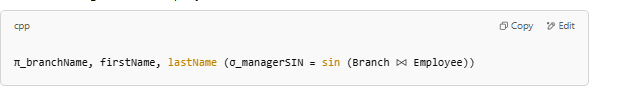

older version
The **implicit join** (using the `FROM` clause with a `WHERE` condition) still works but is considered a less modern approach. 


%%sql
SELECT Branch.branchName, Employee.firstName, Employee.lastName 
FROM Branch, Employee 
WHERE Branch.managerSIN = Employee.sin;

The **explicit join** (`JOIN ... ON`) makes it clearer that you are joining two tables based on a condition.
For clarity and best practice, I recommend using the `JOIN` syntax, but both will give the same results in this case.

In [7]:
%%sql
SELECT Branch.branchName, Employee.firstName, Employee.lastName
FROM Branch
JOIN Employee ON Branch.managerSIN = Employee.sin;


 * sqlite:///bank.db
   sqlite:///cssys.db
Done.


branchName,firstName,lastName
London,Phillip,Edwards
Latveria,Victor,Doom
New York,Victor,Doom
Berlin,Deborah,Hernandez
Moscow,Cheryl,Thompson


5.6 (1 point) Please write a SQL query to find the SIN, first name, and last name of employees who share the same name with one or more customers.

1. join er somoy amra usually try kori jate 'ON' er pore oder PK=FK thake.  
    jodi duita table e kono realated pk, fk na thake tahole amra 'ON' er pore 'WHERE' clause er condition use korte pari.
2. join er somoy amra usually try kori jate 'ON' er pore dui table e jeta shoman but different name e ase oita shoman shoman kora  
    oitai korsi

In [8]:
%%sql
SELECT Employee.sin, Employee.firstName, Employee.lastName
FROM Employee
JOIN Customer ON Employee.firstName = Customer.firstName 
              AND Employee.lastName = Customer.lastName;


 * sqlite:///bank.db
   sqlite:///cssys.db
Done.


sin,firstName,lastName
14295,Anne,Ramirez
27004,Steven,Johnson
28453,Margaret,White
29474,Amanda,White
30807,Roy,Morris
31964,Victor,Doom
38351,Victor,Perez
41545,Terry,Bailey
44459,Gerald,Watson
51850,Victor,Doom


5.7 (2 points) Please write a SQL query to show account number, account type, account balance, and transaction amount of the accounts with balance higher than 100,000 and transaction amouns higher than 15000, starting with the accounts with the highest transaction amount and highest account balance. 

In [9]:
%%sql
SELECT Account.accNumber, Account.type, Account.balance, Transactions.amount
FROM Account
JOIN Transactions ON Account.accNumber = Transactions.accNumber
WHERE Account.balance > 100000 AND Transactions.amount > 15000
ORDER BY Transactions.amount DESC, Account.balance DESC;


 * sqlite:///bank.db
   sqlite:///cssys.db
Done.


accNumber,type,balance,amount
9,SAV,132271.23,114869.79
8,BUS,121267.54,114680.63
31,CHQ,111209.89,110249.28
1,SAV,118231.13,109587.15
25,SAV,105997.07,109068.54
13,CHQ,112505.84,108440.2
20,CHQ,107270.59,108278.46
4,BUS,106503.6,104550.76
26,SAV,112046.36,104346.46
6,CHQ,107309.23,104247.4


5.8 (2 points) Please write a SQL query to find the customer ID, first name, and last name of customers who own accounts at London and Berlin branches, order by last name and first name.

In [10]:
%%sql
SELECT DISTINCT Customer.customerID, Customer.firstName, Customer.lastName
FROM Customer
JOIN Owns ON Customer.customerID = Owns.customerID
JOIN Account ON Owns.accNumber = Account.accNumber
JOIN Branch ON Account.branchNumber = Branch.branchNumber
WHERE Branch.branchName IN ('London', 'Berlin')
GROUP BY Customer.customerID, Customer.firstName, Customer.lastName
HAVING COUNT(DISTINCT Branch.branchName) = 2
ORDER BY Customer.lastName, Customer.firstName;


 * sqlite:///bank.db
   sqlite:///cssys.db
Done.


customerID,firstName,lastName
66418,Stephanie,Adams
89197,Lawrence,Anderson
41545,Terry,Bailey
33726,Jerry,Cook
86357,Andrew,Evans
44922,Dennis,Flores
87978,Christopher,Gonzalez
10839,Amy,Hayes
99537,Deborah,Hernandez
13697,Charles,Hill


## Submission

Complete the code in this notebook, and submit it to through Canvas system to your Homework 1 activity.